## Assignment 1.1

### Part 1

#### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

In [16]:
# The problem with random networks in comparison to real world networks is that they do not capture how well real-world networks are actually connected. 
# Basically the clustering coefficient in real world networks is larger

List the four regimes that characterize random networks as a function of < k >

In [17]:
# Four regimes that characterize random network as a function of <k>
# Subcritical Regime: <k> < 1
# Critical Point: <k> = 1 - emergence of a giant component
# Supercritical Regime: <k> > 1
# Connected Regime: <k> > lnN

According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

In [18]:
# In real-world networks, high-degree nodes (hubs) tend to have lower clustering coefficients because they connect to many nodes that are not directly 
# connected to each other. This leads to a hierarchical structure where low-degree 
# nodes form tightly-knit communities, while high-degree nodes serve as bridges between these communities. Random networks 
# do not capture this hierarchical organization and the associated clustering patterns, making them less representative of real-world networks.

#### WS edition

First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1.
Calculate the average shortest path length < d > for each one.

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

graph1 = nx.watts_strogatz_graph(500, 4, 0)
graph2 = nx.watts_strogatz_graph(500, 4, 0.1)
graph3 = nx.watts_strogatz_graph(500, 4, 1) 

avg_shortest_path1 = nx.average_shortest_path_length(graph1)
avg_shortest_path2 = nx.average_shortest_path_length(graph2)
avg_shortest_path3 = nx.average_shortest_path_length(graph3)

print("Average shortest path length for graph1 (p=0):", avg_shortest_path1)
print("Average shortest path length for graph2 (p=0.1):", avg_shortest_path2)
print("Average shortest path length for graph3 (p=1):", avg_shortest_path3)

Average shortest path length for graph1 (p=0): 62.875751503006015
Average shortest path length for graph2 (p=0.1): 7.686076152304609
Average shortest path length for graph3 (p=1): 4.741547094188377


Describe what happens to the network when p = 1

In [20]:
## When p=1 the network becomes a random graph, losing its regular structure and exhibiting properties typical of random networks, 
# such as shorter average path lengths and lower clustering coefficients.

Generate a lot of networks with different values of p. 
You will notice that paths are short when p is close to one and they are long when p=0. 
What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [21]:
p_values = [i/10 for i in range(11)]  # [0.0, 0.1, 0.2, ..., 1.0]

avg_shortest_paths = []

fully_random_network = nx.erdos_renyi_graph(500, 0.1)
avg_shortest_path_fully_random = nx.average_shortest_path_length(fully_random_network)

for p in p_values:
    graph = nx.watts_strogatz_graph(500, 4, p)
    avg_shortest_path = nx.average_shortest_path_length(graph)
    avg_shortest_paths.append(avg_shortest_path)
    print(f"Average shortest path length for p={p}: {avg_shortest_path} (compared to fully random: {avg_shortest_path_fully_random})")


Average shortest path length for p=0.0: 62.875751503006015 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.1: 6.99664128256513 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.2: 6.285731462925852 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.3: 5.376993987975952 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.4: 5.1949498997995995 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.5: 4.995350701402805 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.6: 4.835174348697395 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.7: 4.787206412825651 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.8: 4.7578997995991985 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.9: 4.78203607214

In [22]:

## The average shortest path length gets close to that of a fully random network already at small values of 
# p =0.1 or 0.2, indicating that even a small amount of randomness in the network can significantly reduce path lengths.

Let's investigate this behavior in detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.3, 0.05, 0.1, 0.2}. 
Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [23]:

import numpy as np
p_values_detailed = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_shortest_paths_detailed = []
std_dev_shortest_paths_detailed = []
num_networks = 50
fully_random_network = nx.erdos_renyi_graph(500, 0.1)
avg_shortest_path_fully_random = nx.average_shortest_path_length(fully_random_network)
print(f"Average shortest path length for fully random network: {avg_shortest_path_fully_random}")
for p in p_values_detailed:
    shortest_paths = []
    for _ in range(num_networks):
        graph = nx.watts_strogatz_graph(500, 4, p)
        avg_shortest_path = nx.average_shortest_path_length(graph)
        shortest_paths.append(avg_shortest_path)
    avg_shortest_paths_detailed.append(np.mean(shortest_paths))
    std_dev_shortest_paths_detailed.append(np.std(shortest_paths))

Average shortest path length for fully random network: 1.9045370741482965


Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.


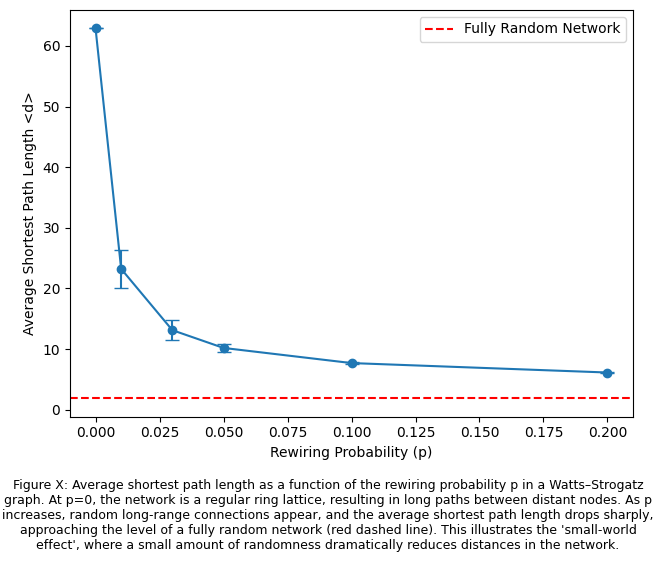

In [26]:
plt.errorbar(p_values_detailed, avg_shortest_paths_detailed,
             yerr=std_dev_shortest_paths_detailed, fmt='o-', capsize=5)
plt.axhline(y=avg_shortest_path_fully_random, color='r', linestyle='--',
            label='Fully Random Network')
plt.xscale('linear')

plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length <d>')
plt.legend()

# Nicely centered caption under the figure
plt.figtext(0.5, -0.15,
    "Figure X: Average shortest path length as a function of the rewiring probability p in a Watts–Strogatz graph. "
    "At p=0, the network is a regular ring lattice, resulting in long paths between distant nodes. "
    "As p increases, random long-range connections appear, and the average shortest path length drops sharply, "
    "approaching the level of a fully random network (red dashed line). This illustrates the 'small-world effect', "
    "where a small amount of randomness dramatically reduces distances in the network.",
    wrap=True, ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### Part 2

### BA Edition

What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. 

In [ ]:
# # 1. Anomalous Regime with y<=2
# # For γ ‹ 2 the exponent 1/(γ− 1) is larger than one, hence the number of links connected to the largest hub grows faster than the size 
# # of the network. This means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, 
# # hence it will run out of nodes to connect to. Similarly, for γ ‹ 2 the average degree 〈k〉 diverges in the N → ∞ limit


# # 2. Scale free regime with 2<y<3
# # In this regime the first moment of the degree distribution is finite but the second and higher moments diverge as N → ∞. Consequently 
# # scalefree networks in this regime are ultra-small. kmax grows with the size of the network 
# # with exponent 1/(γ - 1), which is smaller than one. Hence the market share of the largest hub, kmax /N, representing the fraction of 
# # nodes that connect to it, decreases as kmax/N ~ N-(γ-2)/(γ-1).


# 3.Random Network Regime with y>3
# for γ > 3 both the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime 
# are difficult to distinguish from the properties a random network of similar size. The the average distance 
# between the nodes converges to the small-world formula derived for random networks. The reason is that for large γ the degree distribution 
# pk decays sufficiently fast to make the hubs small and less numerous.

What are the three regimes we find in non-linear preferential attachement

In [ ]:
# 1. Sublinear Preferential Attachment (0 < α < 1)
# For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, 
# not sufficient to generate a scale-free degree distribution

#2. Superlinear Preferential Attachment (α > 1)
# For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process. The consequence of this is most 
# obvious for α > 2, when the model predicts a winner-takes-all phenomenon: almost all nodes connect to a few super-hubs. Hence we observe the 
# emergence of a hub-and-spoke network, in which most nodes link directly to a few central nodes. The situation for 1 < α < 2 is less extreme, 
# but similar.

# 3. Linear Regime (α = 1):
#  This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.


#### We're going to create our own Barabasi-Albert model. Follow the recipe below for success:

First create a graph consisting of a single link.

In [27]:
import random
import numpy as np
graph = nx.Graph()

Now add another node, connecting one of the existing nodes in proportion to their degree.

In [28]:
graph.add_edge(0, 1)

Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

In [29]:
def add_nodes_to_graph_with_degrees(graph, num_nodes):
    new_graph = graph.copy()
    for new_node in range(2, num_nodes):
        edges = list(new_graph.edges())
        flattened_edges = [node for edge in edges for node in edge]
        chosen_node = random.choice(flattened_edges) ## Choosing uniformly from this list is equivalent to picking a node proportional to its degree.
        new_graph.add_edge(new_node, chosen_node)
    return new_graph

graph_100_nodes = add_nodes_to_graph_with_degrees(graph, 100)

Plot the network.

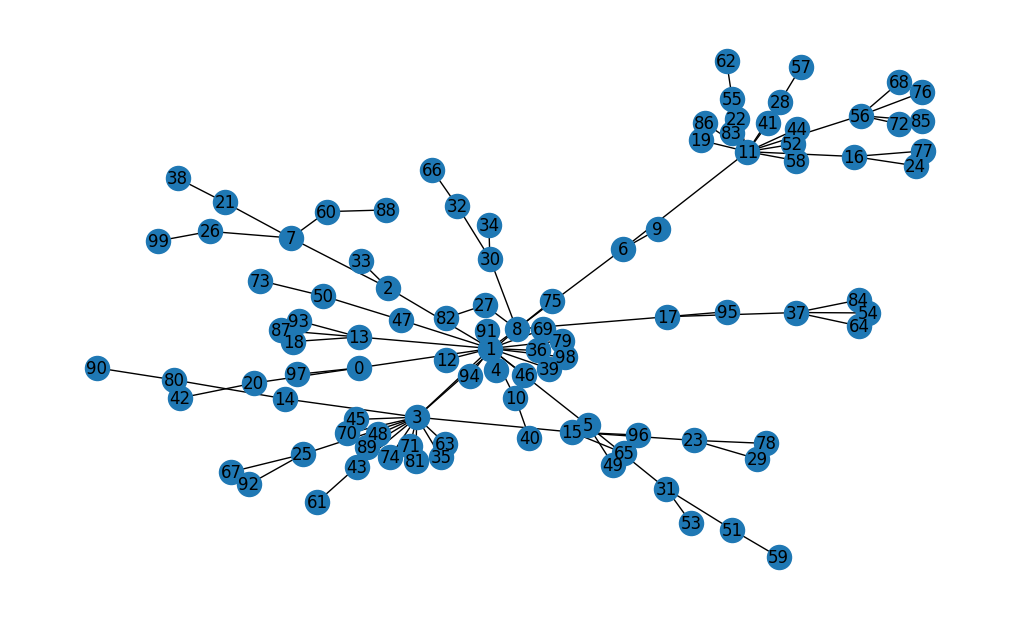

Maximum degree: 18, Minimum degree: 1


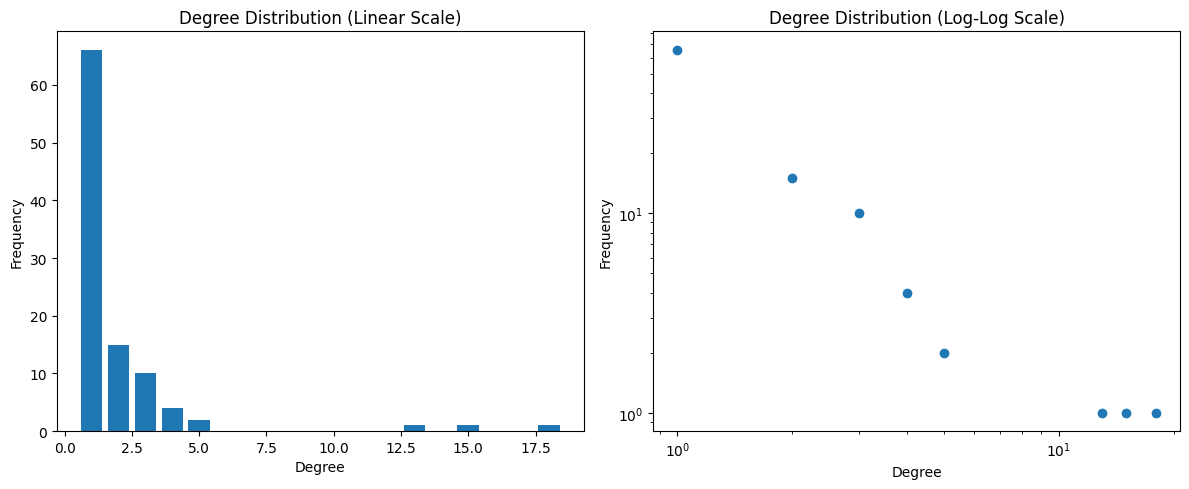

In [30]:
def plot_graph(graph):
    plt.figure(figsize=(10, 6))
    nx.draw(graph, with_labels=True)
    plt.show()

    degrees = [degree for node, degree in graph.degree()]
    max_degree = max(degrees)
    min_degree = min(degrees)
    print(f"Maximum degree: {max_degree}, Minimum degree: {min_degree}")

    # Now, bin the degree distribution using numpy.histogram.
    hist, bin_edges = np.histogram(degrees, bins=range(min_degree, max_degree + 2))
    # Plot the distribution. Plot it with both linear and log-log axes.
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution (Linear Scale)')
    plt.subplot(1, 2, 2)
    plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution (Log-Log Scale)')
    plt.tight_layout()
    plt.show()

plot_graph(graph_100_nodes)

Add more nodes until you have a 5000 node network.

In [ ]:
graph_5000_nodes = add_nodes_to_graph_with_degrees(graph, 5000)

What's the maximum and minimum degree?

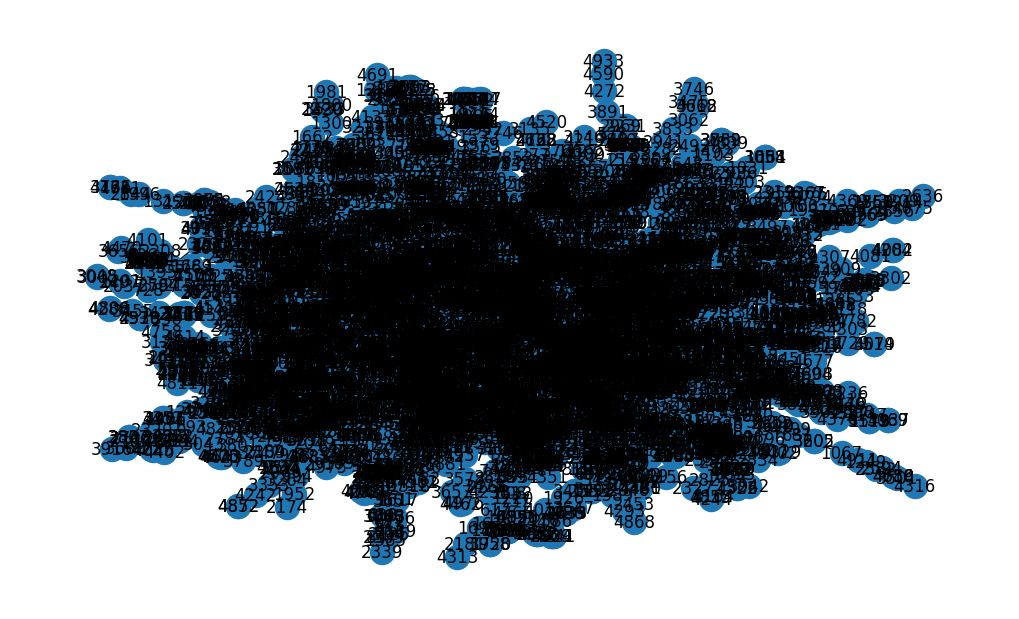

Maximum degree: 95, Minimum degree: 1


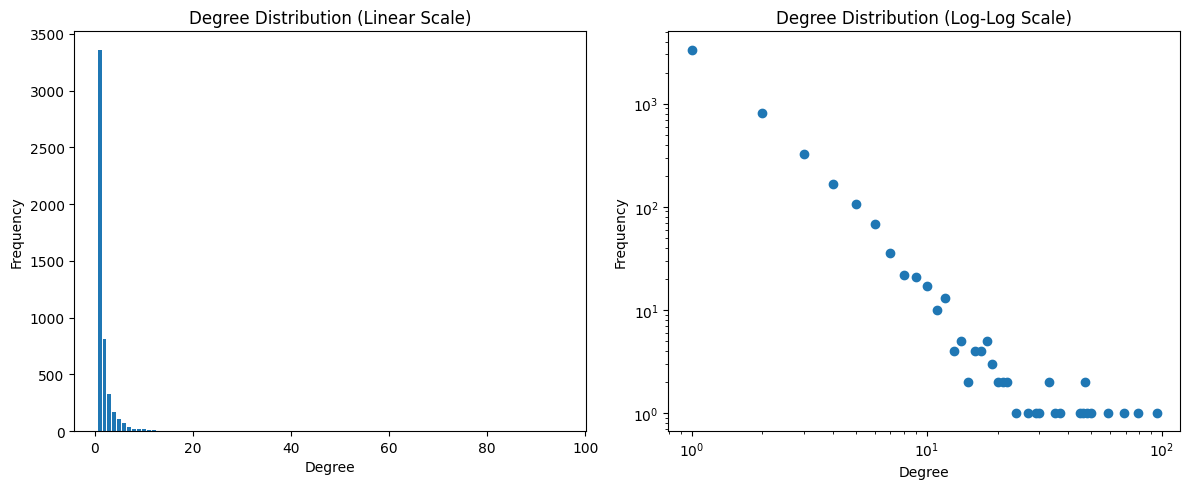

In [31]:

plot_graph(graph_5000_nodes)

What's the maximum and minimum degree?

Now, bin the degree distribution using numpy.histogram.

Plot the distribution. Plot it with both linear and log-log axes.